# Neural Network Models

## Imports

In [1]:
!pip install scikeras


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from scikeras.wrappers import KerasRegressor


In [3]:
data = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/data/merged_data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data

,wave_height,dominant_period,avg_period,dominant_wave_direction_sin,dominant_wave_direction_cos,wave_height_1.0_h,dominant_period_1.0_h,avg_period_1.0_h,dominant_wave_direction_sin_1.0_h,dominant_wave_direction_cos_1.0_h,...,wave_height_9.0_h,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_sin_9.0_h,dominant_wave_direction_cos_9.0_h,score,wind_speed,gust_speed,wind_direction_sin,wind_direction_cos
0,2.56,11.76,9.82,-0.681998,0.731354,2.52,13.33,9.60,-0.669131,0.743145,...,2.94,13.33,10.56,-0.719340,0.694658,6.440000,0.60,1.05,0.410719,0.911762
1,2.46,13.33,9.98,-0.681998,0.731354,2.40,13.33,9.99,-0.669131,0.743145,...,2.80,14.29,10.01,-0.731354,0.681998,7.266667,0.28,0.82,0.671721,-0.740805
2,2.20,12.50,9.79,-0.681998,0.731354,2.56,11.76,9.82,-0.681998,0.731354,...,2.71,13.33,9.84,-0.681998,0.731354,7.223333,0.20,0.78,0.972776,-0.231748
3,2.33,11.76,9.75,-0.681998,0.731354,2.46,13.33,9.98,-0.681998,0.731354,...,2.67,13.33,9.67,-0.694658,0.719340,15.180000,0.28,0.70,0.829038,0.559193
4,2.48,11.76,10.13,-0.529919,0.848048,2.20,12.50,9.79,-0.681998,0.731354,...,2.65,14.29,9.92,-0.719340,0.694658,4.786667,0.52,0.90,-0.923210,0.384295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2.00,13.00,11.00,-0.681998,0.731354,1.90,13.00,11.00,-0.882948,0.469472,...,2.10,13.00,10.80,-0.669131,0.743145,17.300000,0.00,0.60,0.000000,1.000000
344,2.00,13.00,11.30,-0.819152,0.573576,1.90,13.00,10.60,-0.766044,0.642788,...,1.80,13.00,10.70,-0.719340,0.694658,6.700000,0.70,1.54,-0.961262,-0.275637
345,2.10,13.00,11.40,-0.819152,0.573576,2.00,13.00,11.00,-0.681998,0.731354,...,1.80,13.00,10.70,-0.587785,0.809017,9.630000,1.40,2.20,-0.743145,0.669131
346,2.10,13.00,11.20,-0.838671,0.544639,2.00,13.00,11.30,-0.819152,0.573576,...,1.90,13.00,10.80,-0.743145,0.669131,9.915000,2.18,2.70,-0.719340,0.694658


## X, y

In [4]:
X = data.drop(columns='score')
y = data['score']

## Standard Scaler

In [5]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1331)

## Baseline Model RSME

In [7]:
y_baseline_preds = np.full_like(y, y.mean()) 
mean_squared_error(y, y_baseline_preds, squared=False)

3.1675113889842983

## Create list of dicts to save model results

In [19]:
all_model_results = []

## Single Dense Layer Neural Network

#### Create model structure

In [33]:
neurons = 35

model = Sequential()
model.add(Dense(neurons, activation='relu'))
model.add(Dense(1))

#### Compile

In [34]:
# Using help from the docs to get metrics right
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=tf.keras.metrics.RootMeanSquaredError(),
)

#### Make an EarlyStopping callback

In [35]:
# With help from tensorflow documentation
callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=10)

#### Fit the model

In [36]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=1_000,
    callbacks=callback,
    verbose=0
)

#### Plot model performance on the validation data (RMSE)

In [37]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

''

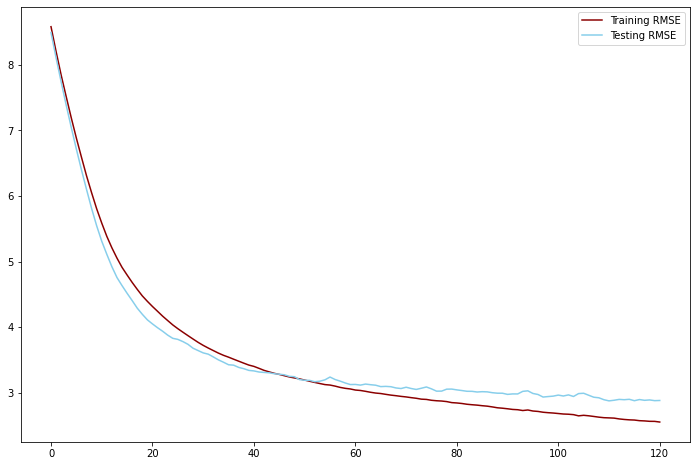

In [38]:
# With help from regularization lesson
# Can substitute hard coded dict keys for reference to history.history.keys()
train_rmse = history.history['root_mean_squared_error']
test_rmse = history.history['val_root_mean_squared_error']

plt.figure(figsize=(12, 8))
plt.plot(train_rmse, label='Training RMSE', color='darkred')
plt.plot(test_rmse, label='Testing RMSE', color='skyblue')
plt.legend()
;

In [39]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 8.3100 - root_mean_squared_error: 2.8827


[8.309996604919434, 2.8827064037323]

In [40]:
nn_train_rmse = history.history['root_mean_squared_error'][-1]
nn_train_rmse

2.5542004108428955

In [41]:
nn_test_rmse = history.history['val_root_mean_squared_error'][-1]
nn_test_rmse

2.8827064037323

### Save model

In [42]:
model.save('/content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/single-layer')

INFO:tensorflow:Assets written to: /content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/single-layer/assets


### Save model result for final comparisson

In [43]:
nn_results = [{
    "Model Name": "Neural Network",
    "Score Type": "Train RMSE",
    "Score": nn_train_rmse,
    "Observations": f"Single Dense Layer with {neurons} neurons",
}, {
    "Model Name": "Neural Network",
    "Score Type": "Test RMSE",
    "Score": nn_test_rmse,
    "Observations": f"Single Dense Layer with {neurons} neurons",
}]

for result in nn_results:
  all_model_results.append(result)

all_model_results


[{'Model Name': 'Neural Network',
  'Observations': 'Single Dense Layer with 35 neurons',
  'Score': 2.5229427814483643,
  'Score Type': 'Train RMSE'},
 {'Model Name': 'Neural Network',
  'Observations': 'Single Dense Layer with 35 neurons',
  'Score': 2.955470561981201,
  'Score Type': 'Test RMSE'},
 {'Model Name': 'Neural Network Grid Search',
  'Observations': {'callbacks': <keras.callbacks.EarlyStopping at 0x7f5ea8459590>,
   'epochs': 200,
   'model__dropout_rate': 0.15,
   'model__neurons': 45},
  'Score': 2.823276996612549,
  'Score Type': 'Train RMSE'},
 {'Model Name': 'Neural Network Grid Search',
  'Observations': {'callbacks': <keras.callbacks.EarlyStopping at 0x7f5ea8459590>,
   'epochs': 200,
   'model__dropout_rate': 0.15,
   'model__neurons': 45},
  'Score': 3.0185906887054443,
  'Score Type': 'Test RMSE'},
 {'Model Name': 'Neural Network',
  'Observations': 'Single Dense Layer with 35 neurons',
  'Score': 2.5542004108428955,
  'Score Type': 'Train RMSE'},
 {'Model Name'

## Neural Network with Grid Search CV

To use GridSearchCV the Neural Network is instantiated in a KerasRegressor class from the scikeras library: https://www.adriangb.com/scikeras/stable/

### Single layer and GS over neurons

In [21]:
# Establish input shape
n_input = X_train.shape[1]

In [44]:
# Create model function. Required by KerasRegressor
def create_model(neurons, dropout_rate):
  model = Sequential()
  model.add(Dense(neurons, input_dim=n_input, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  # Model compile
  model.compile(
    optimizer='adam',
    loss="mean_squared_error",
    metrics=tf.keras.metrics.RootMeanSquaredError(),
  )
  return model

In [45]:
# Instantiate model inside Keras Regressor class
model = KerasRegressor(model=create_model, verbose=0)

In [46]:
# Define grid search parameters
params= {
    'epochs': [200],
    'callbacks': [tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=10)],
    'model__neurons': [15, 25, 45, 55],
    'model__dropout_rate': [.05, .1],
}

#### Grid Search

In [47]:
nn_gs = GridSearchCV(
    estimator=model,
    param_grid=params,
    n_jobs=-1,
)

nn_gs.fit(X_train, y_train)
print(nn_gs.best_params_)

{'callbacks': <keras.callbacks.EarlyStopping object at 0x7f5eaaf43490>, 'epochs': 200, 'model__dropout_rate': 0.1, 'model__neurons': 45}


In [48]:
# Score on training and testing set
print(f"R-squared score on train set: {nn_gs.best_estimator_.score(X_train, y_train)}")
print(f"R-squared score on test set: {nn_gs.best_estimator_.score(X_test, y_test)}")

R-squared score on train set: 0.3984802966312002
R-squared score on test set: 0.026689040988258417


In [49]:
nn_gs.best_params_

{'callbacks': <keras.callbacks.EarlyStopping at 0x7f5eaaf43490>,
 'epochs': 200,
 'model__dropout_rate': 0.1,
 'model__neurons': 45}

In [50]:
nn_gs_train_rmse = nn_gs.best_estimator_.model_.evaluate(X_train, y_train)[1]
nn_gs_train_rmse


9/9 [==============================] - 0s 4ms/step - loss: 6.2258 - root_mean_squared_error: 2.4951


2.495145559310913

In [51]:
nn_gs_test_rmse = nn_gs.best_estimator_.model_.evaluate(X_test, y_test)[1]
nn_gs_test_rmse

3/3 [==============================] - 0s 6ms/step - loss: 8.7274 - root_mean_squared_error: 2.9542


2.954209566116333

#### Save model

In [52]:
nn_gs.best_estimator_.model_.save('/content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/single-dropout')

INFO:tensorflow:Assets written to: /content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/single-dropout/assets


#### Save model result for final comparisson

In [53]:
nn_gs_results = [{
    "Model Name": "Neural Network Grid Search",
    "Score Type": "Train RMSE",
    "Score": nn_gs_train_rmse,
    "Observations": nn_gs.best_params_,
}, {"Model Name": "Neural Network Grid Search",
    "Score Type": "Test RMSE",
    "Score": nn_gs_test_rmse,
    "Observations": nn_gs.best_params_,}]

for result in nn_gs_results:
  all_model_results.append(result)


### Dense and dropout layers and GS over neurons, dropout rate

In [71]:
# Establish input shape
n_input = X_train.shape[1]

In [72]:
# Create model function. Required by KerasRegressor
def create_model(neurons, dropout_rate, neurons2, dropout_rate2):
  model = Sequential()
  model.add(Dense(neurons, input_dim=n_input, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neurons2, activation='relu'))
  model.add(Dropout(dropout_rate2))
  model.add(Dense(1))
  # Model compile
  model.compile(
    optimizer='adam',
    loss="mean_squared_error",
    metrics=tf.keras.metrics.RootMeanSquaredError(),
  )
  return model

In [73]:
# Instantiate model inside Keras Regressor class
model = KerasRegressor(model=create_model, verbose=0)

In [74]:
# Define grid search parameters
params= {
    'epochs': [200],
    'callbacks': [tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=10)],
    'model__neurons': [55, 65, 75, 100],
    'model__dropout_rate': [.15, .25, .35, .45],
    'model__neurons2': [65, 75, 100],
    'model__dropout_rate2': [.1, .2, .3],
}

#### Grid Search

In [75]:
nn_gs2 = GridSearchCV(
    estimator=model,
    param_grid=params,
    n_jobs=-1,
)

nn_gs2.fit(X_train, y_train)
print(nn_gs2.best_params_)

{'callbacks': <keras.callbacks.EarlyStopping object at 0x7f5eaae9ad10>, 'epochs': 200, 'model__dropout_rate': 0.35, 'model__dropout_rate2': 0.2, 'model__neurons': 65, 'model__neurons2': 75}


In [76]:
# Score on training and testing set
print(f"R-squared score on train set: {nn_gs2.best_estimator_.score(X_train, y_train)}")
print(f"R-squared score on test set: {nn_gs2.best_estimator_.score(X_test, y_test)}")

R-squared score on train set: 0.4345326462048509
R-squared score on test set: 0.0900863396448145


In [77]:
nn_gs2.best_params_

{'callbacks': <keras.callbacks.EarlyStopping at 0x7f5eaae9ad10>,
 'epochs': 200,
 'model__dropout_rate': 0.35,
 'model__dropout_rate2': 0.2,
 'model__neurons': 65,
 'model__neurons2': 75}

In [78]:
nn_gs2_train_rmse = nn_gs2.best_estimator_.model_.evaluate(X_train, y_train)[1]
nn_gs2_train_rmse


9/9 [==============================] - 0s 4ms/step - loss: 5.8526 - root_mean_squared_error: 2.4192


2.4192166328430176

In [79]:
nn_gs2_test_rmse = nn_gs2.best_estimator_.model_.evaluate(X_test, y_test)[1]
nn_gs2_test_rmse

3/3 [==============================] - 0s 5ms/step - loss: 8.1589 - root_mean_squared_error: 2.8564


2.856377363204956

#### Save model

In [80]:
nn_gs2.best_estimator_.model_.save('/content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/double-dropout')

INFO:tensorflow:Assets written to: /content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/saved-models/double-dropout/assets


#### Save model result for final comparisson

In [81]:
nn_gs2_results = [{
    "Model Name": "Neural Network Grid Search 2",
    "Score Type": "Train RMSE",
    "Score": nn_gs2_train_rmse,
    "Observations": nn_gs2.best_params_,
}, {"Model Name": "Neural Network Grid Search 2",
    "Score Type": "Test RMSE",
    "Score": nn_gs2_test_rmse,
    "Observations": nn_gs2.best_params_,}]

for result in nn_gs2_results:
  all_model_results.append(result)


## Save results to csv

In [82]:
pd.DataFrame(all_model_results).to_csv('/content/drive/Othercomputers/My MacBook Air/Dropbox/ga/capstone/model-results/neuralnetworks.csv')